# Create Image Example
create an image of the zodiacal light as seen from an imager near earth

In [1]:
# move to the working directory
%cd ..

/mnt/d/CodingProjects/zodiacal-polarized


In [2]:
# import the necessary modules
from zodipol.utils.argparser import ArgParser
from zodipol.zodipol import Zodipol, Observation
from zodipol.visualization.skymap_plots import plot_satellite_image, plot_satellite_image_indices

In [3]:
parser = ArgParser(args=['-res', '300', '200', '--fov', '180', '-dir', '90', '40', '-par', '-ip', 'exposure_time', '10*u.s'])

In [4]:
zodipol = Zodipol(polarizance=parser["polarizance"], fov=parser["fov"], n_polarization_ang=parser["n_polarization_ang"], parallel=parser["parallel"], n_freq=parser["n_freq"], planetary=parser["planetry"], isl=parser["isl"], resolution=parser["resolution"], imager_params=parser["imager_params"])
obs = zodipol.create_observation(theta=parser["direction"][0], phi=parser["direction"][1], lonlat=False, new_isl=parser["new_isl"])

/mnt/d/CodingProjects/zodiacal-polarized/zodipol/zodipy_local/zodipy_local/_source_funcs.py:28: RuntimeWarning: overflow encountered in expm1
  term2 = np.expm1((h * freq) / (k_B * T))


## Displaying the simulated results (per-frequency)

In [5]:
binned_emission = obs.get_binned_emission(parser["polarization_angle"], parser["polarizance"])
binned_dolp = obs.get_dolp()
binned_aop = obs.get_aop()

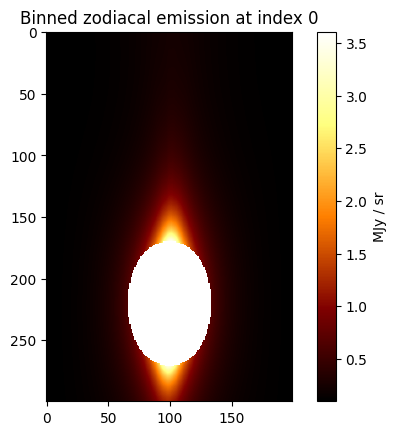

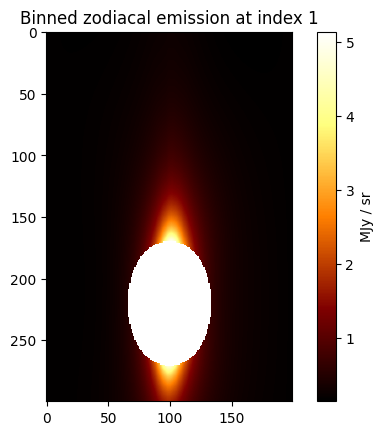

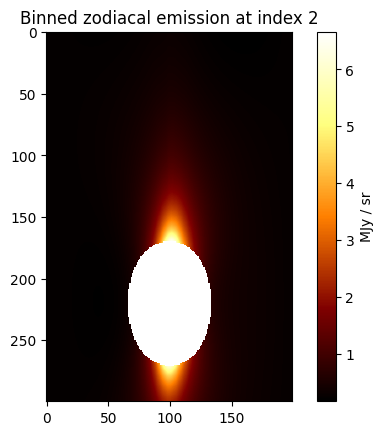

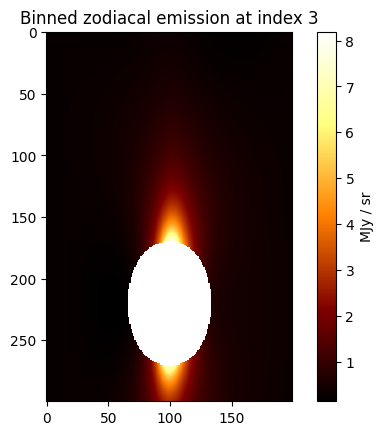

In [6]:
plot_satellite_image_indices(binned_emission[..., -1, :], 4, resolution=parser["resolution"], title="Binned zodiacal emission")

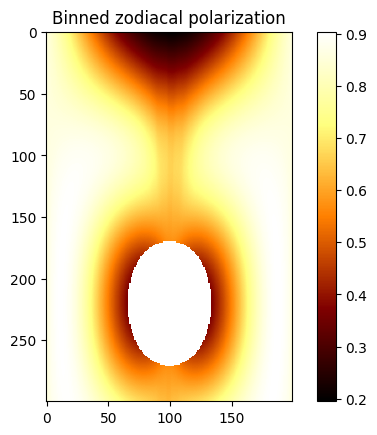

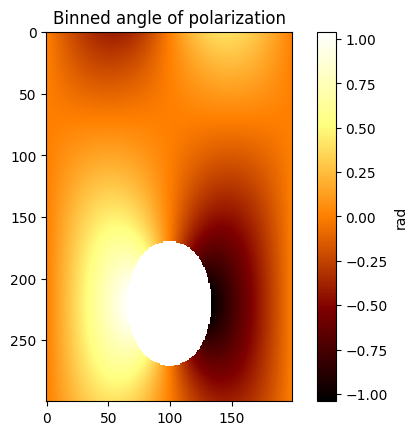

In [7]:
plot_satellite_image(binned_dolp[..., -1], resolution=parser["resolution"], title="Binned zodiacal polarization")
plot_satellite_image(binned_aop[..., -1], resolution=parser["resolution"], title="Binned angle of polarization")

# Displaying camera unnoised results

In [8]:
camera_intensity = zodipol.make_camera_images(obs, n_realizations=parser["n_realizations"], add_noise=False)
obs_camera_intensity = Observation.from_image(camera_intensity, parser["polarization_angle"])
camera_dolp = obs_camera_intensity.get_dolp()
camera_aop = obs_camera_intensity.get_aop()

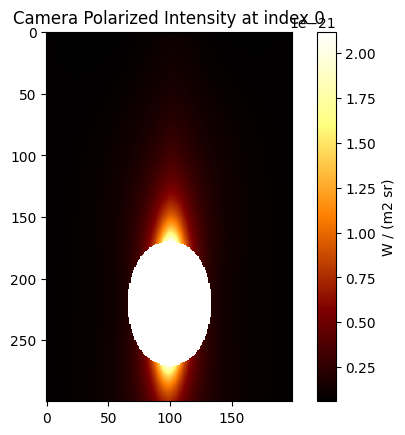

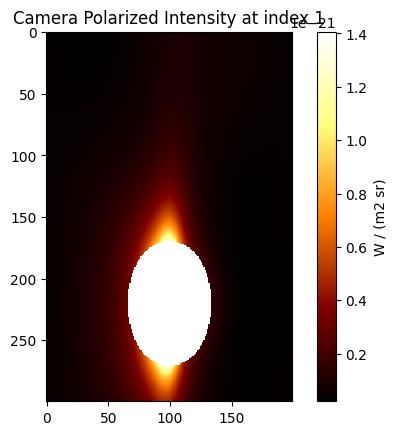

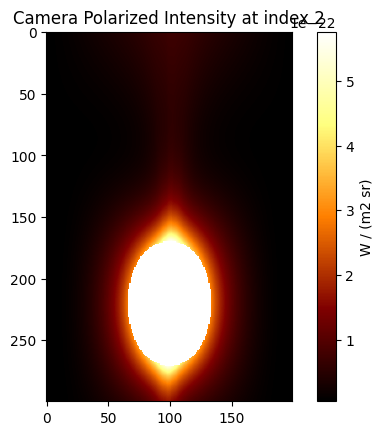

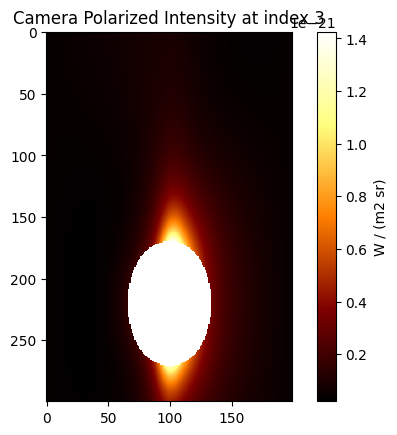

In [9]:
plot_satellite_image_indices(camera_intensity, 4, resolution=parser["resolution"], title="Camera Polarized Intensity")

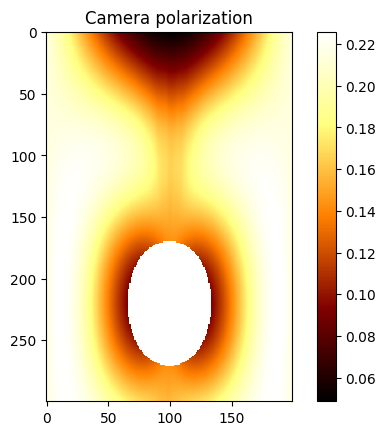

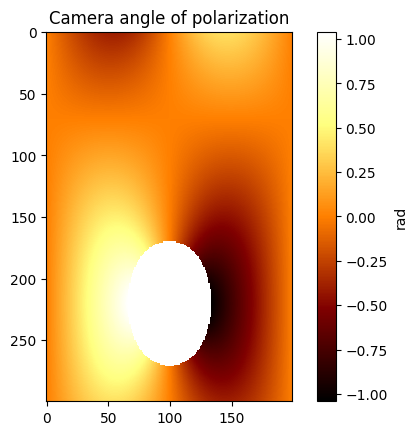

In [10]:
plot_satellite_image(camera_dolp, resolution=parser["resolution"], title="Camera polarization")
plot_satellite_image(camera_aop, resolution=parser["resolution"], title="Camera angle of polarization")

## Displaying camera noised results

In [11]:
camera_intensity_noise = zodipol.make_camera_images(obs, n_realizations=parser["n_realizations"], add_noise=True)
obs_camera_intensity_noise = Observation.from_image(camera_intensity_noise, parser["polarization_angle"])
camera_dolp_noise = obs_camera_intensity_noise.get_dolp()
camera_aop_noise = obs_camera_intensity_noise.get_aop()

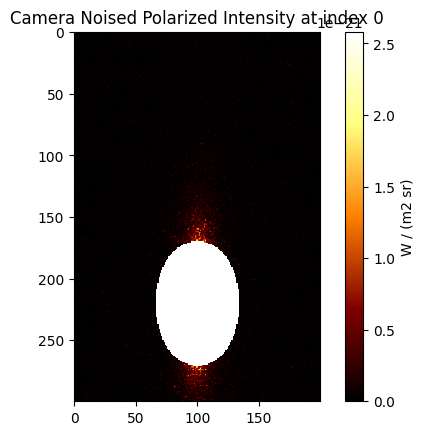

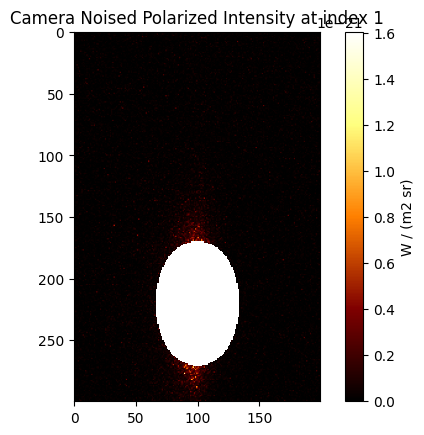

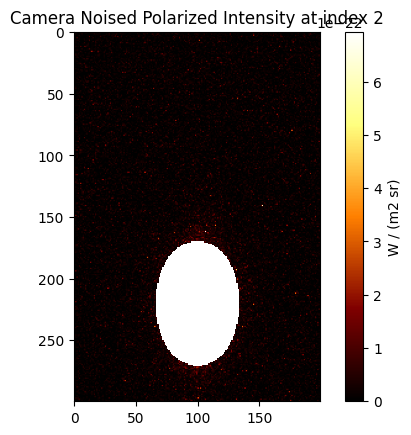

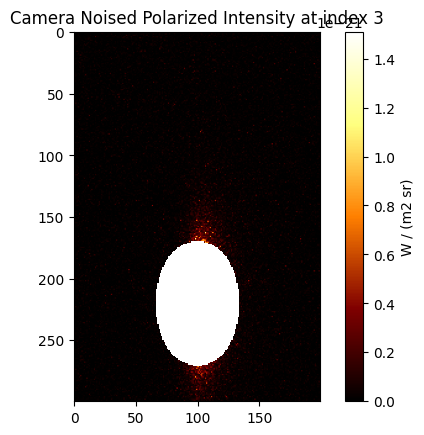

In [12]:
plot_satellite_image_indices(camera_intensity_noise, 4, resolution=parser["resolution"], title="Camera Noised Polarized Intensity")

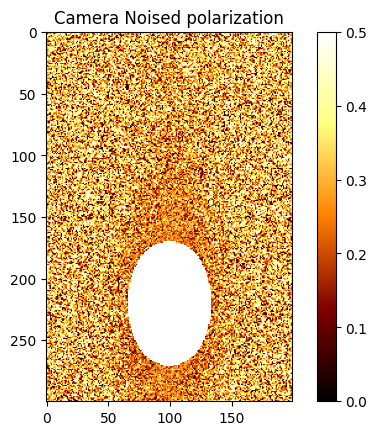

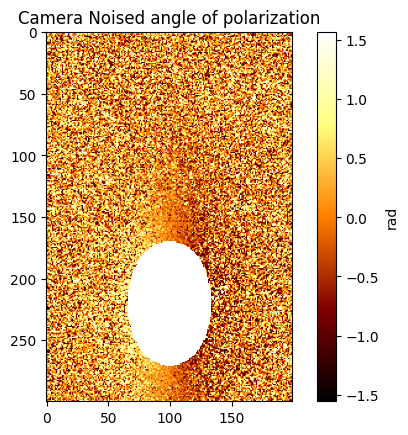

In [13]:
plot_satellite_image(camera_dolp_noise, resolution=parser["resolution"], title="Camera Noised polarization")
plot_satellite_image(camera_aop_noise, resolution=parser["resolution"], title="Camera Noised angle of polarization")